In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
np.random.seed(1)
N=100
K=3
T3=np.zeros((N,3),dtype=np.uint8)
X=np.zeros((N,2))
X_range0=[-3,3]
X_range1=[-3,3]
X_col=['cornflowerblue','black','white']
Mu=np.array([[-.5,-.5],[.5,1.0],[1,-.5]])
Sig=np.array([[.7,.7],[.8,.3],[.3,.8]])
Pi=np.array([0.4,0.8,1])
for n in range(N):
    wk=np.random.rand()
    for k in range(K):
        if wk<Pi[k]:
            T3[n,k]=1
            break
    for k in range(2):
        X[n,k]=(np.random.randn()*Sig[T3[n,:]==1,k]+Mu[T3[n,:]==1,k])
        

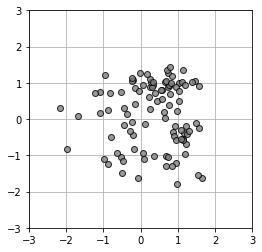

In [7]:
def show_data(x):
    plt.plot(x[:,0],x[:,1],linestyle='None',marker='o',markersize=6,markeredgecolor='black',color='grey',alpha=0.8)
    plt.grid(True)
    
plt.figure(1,figsize=(4,4))
show_data(X)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()
np.savez('data_ch9.npz',X=X,X_range0=X_range0,X_range1=X_range1)

In [8]:
Mu=np.array([[-2,1],[-2,0],[-2,-1]])
R=np.c_[np.ones((N,1),dtype=int),np.zeros((N,2),dtype=int)]

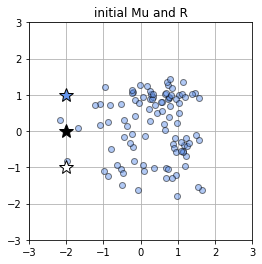

In [14]:
def show_prm(x,r,mu,col):
    for k in range(K):
        plt.plot(x[r[:,k]==1,0],x[r[:,k]==1,1],marker='o',markerfacecolor=X_col[k],markeredgecolor='k',markersize=6,linestyle='None',alpha=0.5)
        plt.plot(mu[k,0],mu[k,1],marker='*',markerfacecolor=X_col[k],markersize=15,markeredgecolor='k',markeredgewidth=1)
    
    plt.xlim(X_range0)
    plt.ylim(X_range1)
    plt.grid(True)
    
plt.figure(figsize=(4,4))
R=np.c_[np.ones((N,1)),np.zeros((N,2))]
show_prm(X,R,Mu,X_col)    
plt.title("initial Mu and R")
plt.show()
    

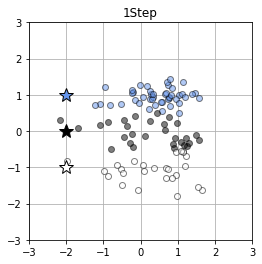

In [17]:
def step1_kmeans(x0,x1,mu):
    N=len(x0)
    r=np.zeros((N,K))
    for n in range(N):
        wk=np.zeros(K)
        for k in range(K):
            wk[k]=(x0[n]-mu[k,0])**2+(x1[n]-mu[k,1])**2
        r[n,np.argmin(wk)]=1
    return r

plt.figure(figsize=(4,4))
R=step1_kmeans(X[:,0],X[:,1],Mu)
show_prm(X,R,Mu,X_col)
plt.title('1Step')
plt.show()

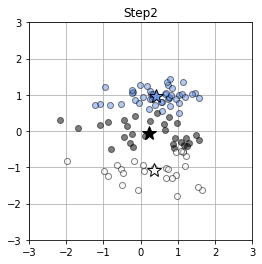

In [22]:
def step2_kmeans(x0,x1,r):
    mu=np.zeros((K,2))
    for k in range(K):
        mu[k,0]=np.sum(r[:,k]*x0)/np.sum(r[:,k])
        mu[k,1]=np.sum(r[:,k]*x1)/np.sum(r[:,k])
    return mu
    
plt.figure(figsize=(4,4))
Mu=step2_kmeans(X[:,0],X[:,1],R)
plt.title('Step2')
show_prm(X,R,Mu,X_col)
plt.show()

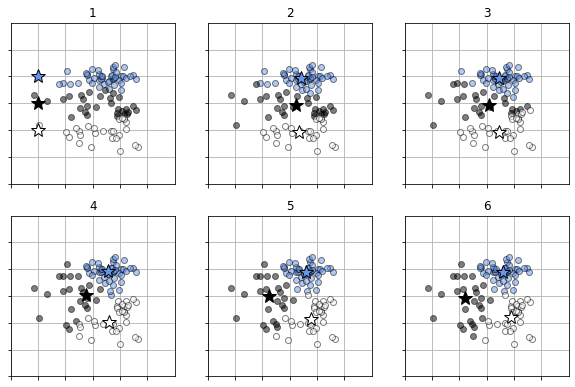

In [27]:
plt.figure(1,figsize=(10,6.5))
Mu=np.array([[-2,1],[-2,0],[-2,-1]])
max_it=6
for it in range(0,max_it):
    plt.subplot(2,3,it+1)
    R=step1_kmeans(X[:,0],X[:,1],Mu)
    show_prm(X,R,Mu,X_col)
    plt.title("{0:d}".format(it+1))
    plt.xticks(range(X_range0[0],X_range0[1]),"")
    plt.yticks(range(X_range1[0],X_range1[1]),"")
    Mu=step2_kmeans(X[:,0],X[:,1],R)
plt.show()

In [28]:
def distortion_measure(x0,x1,r,mu):
    N=len(x0)
    J=0
    for n in range(N):
        for k in range(K):
            J=J+r[n,k]*((x0[n]-mu[k,0])**2+(x1[n]-mu[k,1])**2)
    return J

Mu=np.array([[-2,1],[-2,0],[-2,-1]])
R=np.c_[np.ones((N,1),dtype=int),np.zeros((N,2),dtype=int)]
distortion_measure(X[:,0],X[:,1],R,Mu)

771.7091170334878

[627.54  73.39  70.39  57.59  48.31  47.28  46.86  46.86  46.86  46.86]


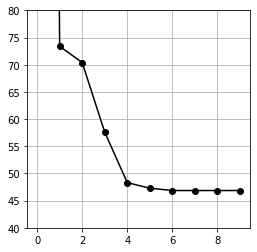

In [33]:
N=X.shape[0]
K=3
Mu=np.array([[-2,1],[-2,0],[-2,-1]])
R=np.c_[np.ones((N,1),dtype=int),np.zeros((N,2),dtype=int)]
max_it=10
DM=np.zeros(max_it)
for it in range(0,max_it):
    R=step1_kmeans(X[:,0],X[:,1],Mu)
    DM[it]=distortion_measure(X[:,0],X[:,1],R,Mu)
    Mu=step2_kmeans(X[:,0],X[:,1],R)
print(np.round(DM,2))
plt.figure(figsize=(4,4))
plt.plot(DM,color='black',linestyle='-',marker='o')
plt.ylim(40,80)
plt.grid(True)
plt.show()

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np
wk=np.load('data_ch9.npz')
X=wk['X']
X_range0=wk['X_range0']
X_range1=wk['X_range1']

In [3]:
def gauss(x,mu,sigma):
    N,D=x.shape
    c1=1/(2*np.pi)**(D/2)
    c2=1/(np.linalg.det(sigma)**(1/2))
    inv_sigma=np.linalg.inv(sigma)
    c3=x-mu
    c4=np.dot(c3,inv_sigma)
    c5=np.zeros(N)
    for d in range(D):
        c5=c5+c4[:,d]*c3[:,d]
    p=c1*c2*np.exp(-c5/2)
    return p

In [4]:
def mixgauss(x,pi,mu,sigma):
    N,D=x.shape
    K=len(pi)
    p=np.zeros(N)
    for k in range(K):
        p=p+pi[k]*gauss(x,mu[k,:],sigma[k,:,:])
    return p

In [5]:
x=np.array([[1,2],[2,2],[3,4]])
pi=np.array([0.3,0.7])
mu=np.array([[1,1],[2,2]])
sigma=np.array([[[1,0],[0,1]],[[2,0],[0,1]]])
print(mixgauss(x,pi,mu,sigma))

[0.09031182 0.09634263 0.00837489]


In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

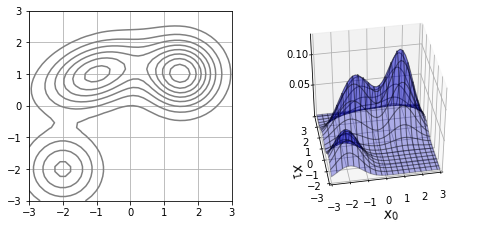

In [7]:
def show_contour_mixgauss(pi, mu, sigma):
    xn = 40 
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, xn * xn,order='F'), np.reshape(xx1, xn * xn, order='F')]
    f = mixgauss(x, pi, mu, sigma)
    f = f.reshape(xn, xn)
    f = f.T
    plt.contour(x0, x1, f, 10, colors='gray')


def show3d_mixgauss(ax, pi, mu, sigma):
    xn = 40 
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, xn * xn, order='F'), np.reshape(xx1, xn * xn, order='F')]
    f = mixgauss(x, pi, mu, sigma)
    f = f.reshape(xn, xn)
    f = f.T
    ax.plot_surface(xx0, xx1, f, rstride=2, cstride=2, alpha=0.3,
                    color='blue', edgecolor='black')
pi = np.array([0.2, 0.4, 0.4])
mu = np.array([[-2, -2], [-1, 1], [1.5, 1]])
sigma = np.array(
    [[[.5, 0], [0, .5]], [[1, 0.25], [0.25, .5]], [[.5, 0], [0, .5]]])


Fig = plt.figure(1, figsize=(8, 3.5))
Fig.add_subplot(1, 2, 1)
show_contour_mixgauss(pi, mu, sigma)
plt.grid(True)


Ax = Fig.add_subplot(1, 2, 2, projection='3d')
show3d_mixgauss(Ax, pi, mu, sigma)
Ax.set_zticks([0.05, 0.10])
Ax.set_xlabel('$x_0$', fontsize=14)
Ax.set_ylabel('$x_1$', fontsize=14)
Ax.view_init(40, -100)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()

In [8]:
N=X.shape[0]
K=3
Pi=np.array([0.33,0.33,0.34])
Mu=np.array([[-2,1],[-2,0],[-2,-1]])
Sigma=np.array([[[1,0],[0,1]],[[1,0],[0,1]],[[1,0],[0,1]]])
Gamma=np.c_[np.ones((N,1)),np.zeros((N,2))]

X_col=np.array([[0.4,0.6,0.95],[1,1,1],[0,0,0]])

In [13]:
def show_mixgauss_prm(x,gamma,pi,mu,sigma):
    N,D=x.shape
    show_contour_mixgauss(pi,mu,sigma)
    for n in range(N):
        col=gamma[n,0]*X_col[0]+gamma[n,1]*X_col[1]+gamma[n,2]*X_col[2]
        plt.plot(x[n,0],x[n,1],'o',color=tuple(col),markeredgecolor='black',markersize=6,alpha=0.5)
    for k in range(K):
        plt.plot(mu[k,0],mu[k,1],marker='*',markerfacecolor=tuple(X_col[k]),markersize=15,markeredgecolor='k',markeredgewidth=1)
        
    plt.grid(True)

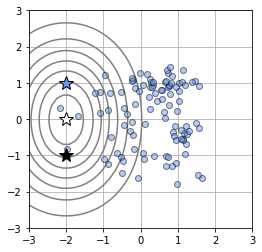

In [14]:
plt.figure(1,figsize=(4,4))
show_mixgauss_prm(X,Gamma,Pi,Mu,Sigma)
plt.show()

In [15]:
def e_step_mixgauss(x,pi,mu,sigma):
    N,D=x.shape
    K=len(pi)
    y=np.zeros((N,K))
    for k in range(K):
        y[:,k]=gauss(x,mu[k,:],sigma[k,:,:])
    gamma=np.zeros((N,K))
    for n in range(N):
        wk=np.zeros(K)
        for k in range(K):
            wk[k]=pi[k]*y[n,k]
        gamma[n,:]=wk/np.sum(wk)
    return gamma
Gamma=e_step_mixgauss(X,Pi,Mu,Sigma)

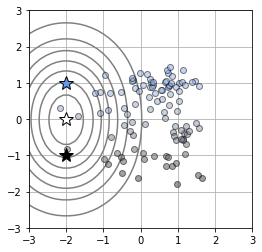

In [16]:
plt.figure(figsize=(4,4))
show_mixgauss_prm(X,Gamma,Pi,Mu,Sigma)
plt.show()

In [18]:
def m_step_mixgauss(x,gamma):
    N,D=x.shape
    N,K=gamma.shape
    pi=np.sum(gamma,axis=0)/N
    mu=np.zeros((K,D))
    for k in range(K):
        for d in range(D):
            mu[k,d]=np.dot(gamma[:,k],x[:,d])/np.sum(gamma[:,k])
            
    sigma=np.zeros((K,D,D))
    for k in range(K):
        for n in range(N):
            wk=x-mu[k,:]
            wk=wk[n,:,np.newaxis]
            sigma[k,:,:]=sigma[k,:,:]+gamma[n,k]*np.dot(wk,wk.T)
        sigma[k,:,:]=sigma[k,:,:]/np.sum(gamma[:,k])
    return pi,mu,sigma

Pi,Mu,Sigma=m_step_mixgauss(X,Gamma)
    

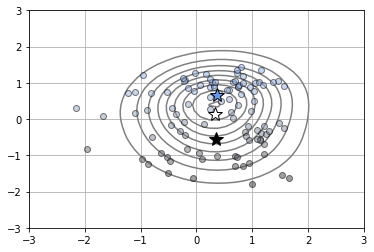

In [19]:
show_mixgauss_prm(X,Gamma,Pi,Mu,Sigma)
plt.show()

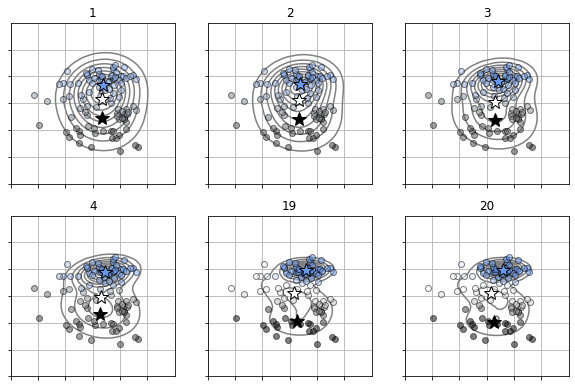

In [21]:
plt.figure(figsize=(10,6.5))
max_it=20
i_subplot=1;

for it in range(0,max_it):
    Gamma=e_step_mixgauss(X,Pi,Mu,Sigma)
    if it<4 or it>17:
        plt.subplot(2,3,i_subplot)
        show_mixgauss_prm(X,Gamma,Pi,Mu,Sigma)
        plt.title("{0:d}".format(it+1))
        plt.xticks(range(X_range0[0],X_range0[1]),"")
        plt.yticks(range(X_range1[0],X_range1[1]),"")
        i_subplot=i_subplot+1
    Pi,Mu,Sigma=m_step_mixgauss(X,Gamma)
plt.show()

In [22]:
def nIh_misguass(x,pi,mu,sigma):
    N,D=x.shape
    K=len(pi)
    y=np.zeros((N,K))
    for k in range(K):
        y[:,k]=gauss(x,mu[k,:],sigma[k,:,:])
    Ih=0
    for n in range(N):
        wk=0
        for k in range(K):
            wk=wk+pi[k]*y[n,k]
        Ih=Ih+np.log(wk)
    return -Ih

[543.47 245.49 241.04 234.81 229.4  226.77 225.65 225.13 224.83 224.6
 224.39 224.19 223.98 223.76 223.49 223.18 222.83 222.45 222.1  221.83]


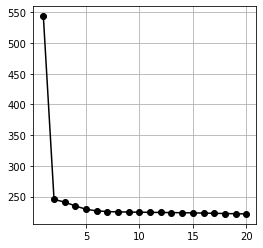

In [27]:
Pi=np.array([0.33,0.33,0.34])
Mu=np.array([[-2,1],[-2,0],[-2,-1]])
Sigma=np.array([[[1,0],[0,1]],[[1,0],[0,1]],[[1,0],[0,1]]])
Gamma=np.c_[np.ones((N,1)),np.zeros((N,2))]
max_it=20
i_subplot=1
Err=np.zeros(max_it)
for it in range(0,max_it):
    Gamma=e_step_mixgauss(X,Pi,Mu,Sigma)
    Err[it]=nIh_misguass(X,Pi,Mu,Sigma)
    Pi,Mu,Sigma=m_step_mixgauss(X,Gamma)
    
print(np.round(Err,2))
plt.figure(figsize=(4,4))
plt.plot(np.arange(max_it)+1,Err,color='k',linestyle='-',marker='o')
plt.grid(True)
plt.show()